In [216]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### Récupération des données


In [217]:
box1temoin = pd.read_csv('C:\\Users\\rpaul\\Desktop\\DAVID\\KinectDataGreenhouse\\Box1_Temoin.csv')
box2hydrique = pd.read_csv('C:\\Users\\rpaul\\Desktop\\DAVID\\KinectDataGreenhouse\\Box2_Stress_hydrique.csv')
box3salin = pd.read_csv('C:\\Users\\rpaul\\Desktop\\DAVID\\KinectDataGreenhouse\\Box3_stress_salin.csv')
box4temoin = pd.read_csv('C:\\Users\\rpaul\\Desktop\\DAVID\\KinectDataGreenhouse\\Box4_Temoin.csv')

## Graphique des signaux

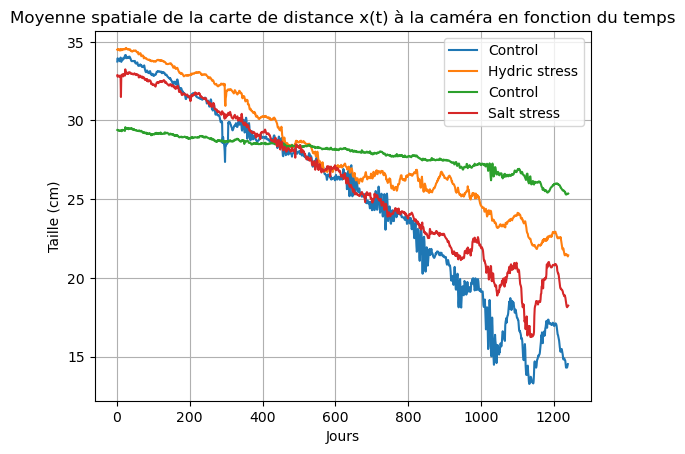

In [218]:
X1, Y1= box1temoin['X'], box1temoin['Y']
X2, Y2= box2hydrique['X'], box2hydrique['Y']
X3, Y3= box3salin['X'], box3salin['Y']
X4, Y4= box4temoin['X'], box4temoin['Y']


plt.plot(X1,Y1)
plt.plot(X2,Y2)
plt.plot(X3,Y3)
plt.plot(X4,Y4)
plt.title('Moyenne spatiale de la carte de distance x(t) à la caméra en fonction du temps')
plt.legend(['Control','Hydric stress','Control','Salt stress'])
plt.xlabel('Jours')
plt.ylabel('Taille (cm)')
plt.grid()
plt.show()

### Graphe comparaisons entre données et régressions

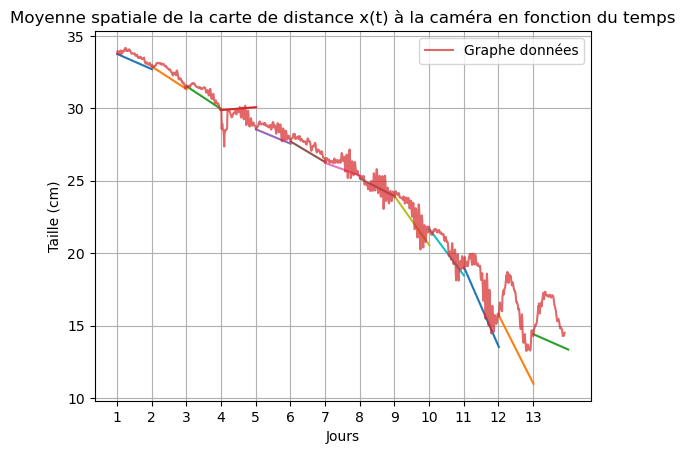

In [219]:
def regre_and_plot(box):
    pentes = []                                     #vecteur qui contient les coeff directeurs de chacunes des pentes journalières
    Xdep, Ydep = [], []                             #vecteurs qui stockent les coordonnées de départ de chzques journées

    for i in range(0, len(box['X']), 96):           #on applique ces étapes à tous les jours

        Xdep.append(box['X'][i])                    #on stocke les coordonnées de départ 
        Ydep.append(box['Y'][i])

        X = box['X'][i:i+95].to_list()              #on stocke les données
        Y = box['Y'][i:i+95].to_list()
            
        X = np.array(X).reshape(-1, 1)              #application d'une régression linéaire
        Y = np.array(Y).reshape(-1, 1)                  #reshape pour transformer en colonne pour la régression
        reg = LinearRegression()   
        reg.fit(X, Y)
        pente = reg.coef_[0][0]
        pentes.append(pente)
        
        X_segment = [Xdep[-1]]                      #génération des coordonnées de la régression
        Y_segment = [Ydep[-1]]

        for j in range(1, 96+1):                    #création du segment point  à point pour le plot après
            x_point = Xdep[-1] + j
            y_point = Ydep[-1] + j * pente
            X_segment.append(x_point)
            Y_segment.append(y_point)

        plt.plot(X_segment, Y_segment)              #trace de la régression
        
        jours = range(1, len(Xdep) + 1)             #configuration de l'axe X pour représenter les jours
        jours_x = [i*96 for i in range(len(Xdep))]
        plt.xticks(jours_x, jours)


    plt.plot(box['X'],box['Y'],alpha=0.7, label='Graphe données')                 #graphe global
    plt.xlabel('Jours')
    plt.ylabel('Taille (cm)')
    plt.grid()
    plt.title('Moyenne spatiale de la carte de distance x(t) à la caméra en fonction du temps')
    plt.legend()
    plt.show()

regre_and_plot(box1temoin)


### Calcul des paramètres

Par la suite, on calcule :  
- Gr(n) la valeur des pentes  
- c1(n) l'amplitude du premier harmonique  
- HDR(n) pour High Dynamic Range, qui permet de regarder la variabilité d'un signal et qui dépend de E(n) l'énergie de ce signal

In [220]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

def listes(box):
    DFFinal = pd.DataFrame()                                                #création d'un DF pour stocker tous nos résultats
    pentes = []                                                             #liste des pentes des journées
    c = []                                                                  #liste des valeurs c1(n)
    HDR = []                                                                #liste des valeurs HDR(n)
    
    for k in range(0, len(box['X']), 96):                                   #boucle pour chaque journée

        X = box['X'][k:k+96].to_list()                                      #création de la régression pour obtenir les données Gr(n)
        Y = box['Y'][k:k+96].to_list()                                          #explication au Code précédent
        X = np.array(X).reshape(-1, 1)
        Y = np.array(Y).reshape(-1, 1)
        reg = LinearRegression()   
        reg.fit(X, Y)
        pente = reg.coef_[0][0]    
        pentes.append(pente)

        tendance = reg.predict(X)                                           #prédiction de la tendance
        
        diff = Y - tendance                                                 #calcul du signal sans tendance
        Y2 = np.array(list(diff.T)[0])                                      #redimension de ce signal
        Y2 = np.pad(Y2, (0, 96 - len(Y2)), 'constant')                      #ajuster la longueur de Y2 à T0=96 si nécessaire, ici on remplit avec des zéros.

        a1n = (2 / 96) * np.trapz(Y2 * np.cos(2 * np.pi * np.arange(0, 96) / 96))
        b1n = (2 / 96) * np.trapz(Y2 * np.sin(2 * np.pi * np.arange(0, 96) / 96))
        c1n = np.sqrt(a1n**2 + b1n**2)                                      #calcul du coefficient de Fourier c1(n)
        c.append(c1n)                                                       #stockage des valeurs

        En = (1/96)*np.trapz((Y2**2),np.arange(0, 96))                      #calcul de l'énergie et HDR
        HDRn = 100 * np.sqrt((En - (c1n**2) / 2) / ((c1n**2) / 2))
        HDR.append(HDRn)                                                    #stockage
        
    DFFinal["Pentes_G(n)"] = np.array(pentes)                               #remplissage du DataFrame avec nos résultats
    DFFinal["c1(n)"] = np.array(c)
    DFFinal["HDR(n)"] = np.array(HDR)

    return DFFinal


listes(box1temoin)
#listes(box2hydrique)
#listes(box3salin)
#listes(box4temoin)


,Pentes_G(n),c1(n),HDR(n)
0,-0.011079,0.164375,79.420883
1,-0.016346,0.210817,89.262819
2,-0.016702,0.241954,76.894187
3,0.001616,0.571778,90.965345
4,-0.010496,0.167654,173.035630
5,-0.015133,0.131049,164.132885
6,-0.009382,0.222596,200.607431
7,-0.012861,0.121936,511.300943
8,-0.034644,0.203401,347.856019
9,-0.033344,0.310405,185.152258


### Représentation 3D des variables obtenues

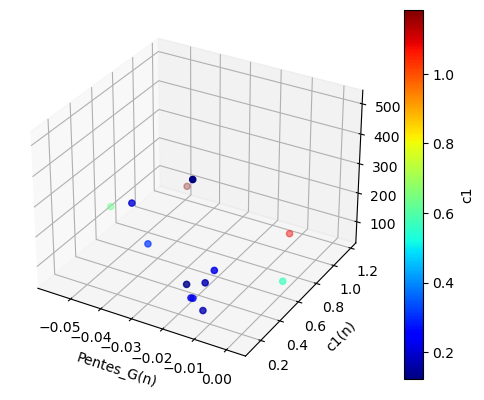

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

DFFinal = listes(box1temoin)                            #choix du dataframe

fig = plt.figure()                                      #création du modèle 3D
ax = fig.add_subplot(111, projection='3d')

x = DFFinal['Pentes_G(n)']                              #récupération des données
y = DFFinal['c1(n)']
z = DFFinal['HDR(n)']
c = DFFinal['c1(n)']                                    #couleurs via c1(n)

sc = ax.scatter(x, y, z, c=c, cmap=cm.jet, marker='o')  #plot des points

cbar = fig.colorbar(sc)                                 #création de la colorbar
cbar.set_label('c1')

ax.set_xlabel('Pentes_G(n)')                            #labels
ax.set_ylabel('c1(n)')
ax.set_zlabel('HDR(n)')

plt.show()                                              #Affichage du graphe 3D
